In [5]:
import pandas as pd
import os
import re

In [6]:
df = pd.read_csv("Ahi Dataset.csv")
df

,utterance,emotion,check,By
0,"1. ""Feeling down today, everything seems a bit...",Sadness,True,A
1,"2. ""Just can't shake off this feeling of heavi...",Sadness,True,A
2,"3. ""It's like a weight in my chest that won't ...",Sadness,True,A
3,"4. ""Trying to find some light in this darkness...",Sadness,True,A
4,"5. ""Feeling a bit lost and not sure how to lif...",Sadness,True,I
...,...,...,...,...
65,"6. ""Terrified about what might happen, need to...",Fear,True,M
66,"7. ""Fearing the worst, trying to keep a brave ...",Fear,True,M
67,"8. ""Feeling a knot in my stomach, scared to mo...",Fear,True,E
68,"9. ""That was really frightening, still shaking.""",Fear,True,E


In [7]:
df = pd.read_csv("Ahi Dataset.csv")
df.drop(['check'],axis=1,inplace=True)
df['utterance'] = df.utterance.apply(lambda x: re.sub(r'[^a-zA-Z ]','',x).lower())
emotions = df.emotion.unique()
df['video'] = [f"{emotion} {i}" for emotion in emotions for i in range(1, 11)]
df

,utterance,emotion,By,video
0,feeling down today everything seems a bit grey,Sadness,A,Sadness 1
1,just cant shake off this feeling of heaviness,Sadness,A,Sadness 2
2,its like a weight in my chest that wont go away,Sadness,A,Sadness 3
3,trying to find some light in this darkness bu...,Sadness,A,Sadness 4
4,feeling a bit lost and not sure how to lift m...,Sadness,I,Sadness 5
...,...,...,...,...
65,terrified about what might happen need to sta...,Fear,M,Fear 6
66,fearing the worst trying to keep a brave face,Fear,M,Fear 7
67,feeling a knot in my stomach scared to move f...,Fear,E,Fear 8
68,that was really frightening still shaking,Fear,E,Fear 9


In [8]:
df['gender'] = df.By.apply(lambda x: 'Male' if x=='I' or x=='M' else 'Female')

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

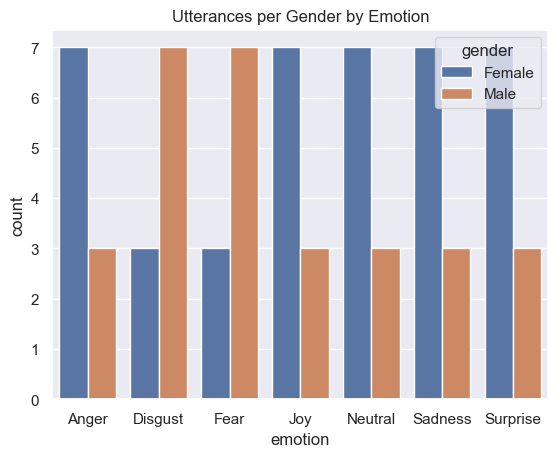

In [10]:
grouped_df = pd.DataFrame(df.groupby('emotion')['gender'].value_counts())

# Reset the index to convert it to a regular DataFrame
grouped_df = grouped_df.rename(columns={'gender': 'count'}).reset_index()

# Plotting
sns.barplot(x='emotion', y='count', hue='gender', data=grouped_df)

plt.title('Utterances per Gender by Emotion')
plt.show()

In [2]:
import os
from moviepy.editor import VideoFileClip

def get_video_lengths(directory):
    lengths = {}
    for filename in os.listdir(directory):
        if filename.endswith(('.mp4')):
            filepath = os.path.join(directory, filename)
            try:
                with VideoFileClip(filepath) as video:
                    lengths[filename] = video.duration
            except Exception as e:
                print(f"Error processing file {filename}: {e}")
    return lengths

video_lengths = get_video_lengths('Emotions dataset/Good')

for video, length in video_lengths.items():
    print(f"{video}: {length} seconds")


Anger 1.mp4: 8.79 seconds
Anger 10.mp4: 8.71 seconds
Anger 2.mp4: 6.64 seconds
Anger 3.mp4: 6.94 seconds
Anger 4.mp4: 9.52 seconds
Anger 5.mp4: 7.01 seconds
Anger 6.mp4: 5.52 seconds
Anger 7.mp4: 6.29 seconds
Anger 8.mp4: 7.31 seconds
Anger 9.mp4: 9.26 seconds
Disgust 1.mp4: 4.13 seconds
Disgust 10.mp4: 6.51 seconds
Disgust 2.mp4: 4.9 seconds
Disgust 3.mp4: 3.73 seconds
Disgust 4.mp4: 5.43 seconds
Disgust 5.mp4: 4.5 seconds
Disgust 6.mp4: 3.5 seconds
Disgust 7.mp4: 4.37 seconds
Disgust 8.mp4: 6.76 seconds
Disgust 9.mp4: 6.64 seconds
Fear 1.mp4: 5.77 seconds
Fear 10.mp4: 7.64 seconds
Fear 2.mp4: 4.07 seconds
Fear 3.mp4: 4.67 seconds
Fear 4.mp4: 4.5 seconds
Fear 5.mp4: 3.07 seconds
Fear 6.mp4: 3.83 seconds
Fear 7.mp4: 5.53 seconds
Fear 8.mp4: 8.76 seconds
Fear 9.mp4: 7.68 seconds
Joy 1.mp4: 10.72 seconds
Joy 10.mp4: 9.3 seconds
Joy 2.mp4: 9.52 seconds
Joy 3.mp4: 8.36 seconds
Joy 4.mp4: 9.31 seconds
Joy 5.mp4: 5.51 seconds
Joy 6.mp4: 4.98 seconds
Joy 7.mp4: 6.08 seconds
Joy 8.mp4: 8.2 sec

In [11]:
df['length'] = video_lengths.values()

<AxesSubplot: xlabel='emotion', ylabel='Duration'>

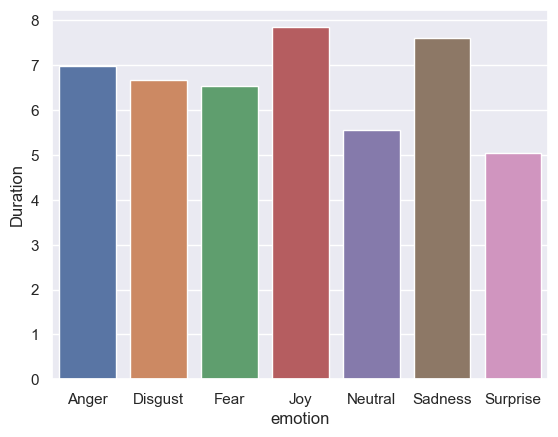

In [15]:
df_len = pd.DataFrame(df.groupby('emotion')['length'].mean())
df_len.columns = ['Duration']
sns.barplot(df_len, x=df_len.index, y='Duration' )
plt.show()